In [28]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import plotly as plot
%matplotlib inline

# content
``` text
in this notebook i will be analyzing the data from african development bank, the data is about the top 5 sector that the bank is finding the most investment in and these are (Agriculture and rural development, Finance, Power, Transport, and ,Multi-Sector).
the bank lists the project name and which country it belongs to and how much the country pays in U.A.
what is U.A. well U.A An activity is defined by a "project" or "operation". 
Currency : XDR For reporting purposes we will use the ISO 4217 Currency Codes. 
UA is the official currency for the AfDB projects. 1 UA=1 SDR (International Monetary Fund Special Drawing Rights). 
(Source: https://www.iatiregistry.org/publisher/about/afdb )
```

# Difine the Problem
well the problem is i wanted to know which country is the most contributing in the development of Africa and declaring the top 3 countries and graph thier percent of contribution in the developments

# Load Data


In [2]:
df_agri = pd.read_csv('agri1.csv', encoding='latin-1')
df_finance1 = pd.read_csv('finance1.csv', encoding='latin-1')
df_multisector1 = pd.read_csv('multisector1.csv', encoding='latin-1')
df_power1 = pd.read_csv('power1.csv', encoding='latin-1')
df_transport1 = pd.read_csv('transport1.csv', encoding='latin-1')

#to check the data
df_agri.info()
df_finance1.info()
df_multisector1.info()
df_power1.info()
df_transport1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113 entries, 0 to 1112
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Project Code         1059 non-null   object
 1   Title                1058 non-null   object
 2   Commitment in U.A    1058 non-null   object
 3   Country              1058 non-null   object
 4   Starting Date        1058 non-null   object
 5   Status               1058 non-null   object
 6   Source of Financing  1056 non-null   object
 7   Sector               1058 non-null   object
 8   Sovereign            1052 non-null   object
dtypes: object(9)
memory usage: 78.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Project Code         337 non-null    object
 1   Title                336 non-null    object
 2   Commitmen

there is some duplicated values , all features are strings 

In [4]:
# convert dates date to datetime type 
df_agri.dropna(inplace= True)
df_finance1.dropna(inplace= True) 
df_multisector1 .dropna(inplace= True) 
df_power1 .dropna(inplace= True)
df_transport1 .dropna(inplace= True) 

In [5]:
df_agri.isnull().sum()

Project Code           0
Title                  0
Commitment in U.A      0
Country                0
Starting Date          0
Status                 0
Source of Financing    0
Sector                 0
Sovereign              0
dtype: int64

In [7]:
# convert the starting date column type to datetime type
df_agri['Starting Date'] = pd.to_datetime(df_transport1['Starting Date'])
df_finance1['Starting Date'] = pd.to_datetime(df_transport1['Starting Date'])
df_multisector1['Starting Date'] = pd.to_datetime(df_transport1['Starting Date'])
df_power1['Starting Date'] = pd.to_datetime(df_transport1['Starting Date'])
df_transport1['Starting Date'] = pd.to_datetime(df_transport1['Starting Date'])

df_agri['Starting_Year'] = df_agri['Starting Date'].dt.year
df_finance1['Starting_Year'] = df_finance1['Starting Date'].dt.year
df_multisector1['Starting_Year'] = df_multisector1['Starting Date'].dt.year
df_power1['Starting_Year'] = df_power1['Starting Date'].dt.year
df_transport1['Starting_Year'] = df_transport1['Starting Date'].dt.year

In [9]:
df_agri.head(2)

,Project Code,Title,Commitment in U.A,Country,Starting Date,Status,Source of Financing,Sector,Sovereign,Starting_Year
0,P-NE-A00-009,Niger - Project to Strengthen Resilience of Ru...,"25,859,000.00",Niger,2020-04-17,Approved,Fragile States Facility,Agriculture and Rural Development,Sovereign,2020.0
1,P-Z1-AA0-137,Multinational South Sudan -Emergency humanitar...,"141,679.18",Multinational,2020-02-28,Approved,Special Relief Funds,Agriculture and Rural Development,Sovereign,2020.0


# i will work on projects that starting in 2019 only 

In [11]:
df_agri_2019 = df_agri[df_agri['Starting_Year'] == 2019]
df_finance1_2019 = df_finance1[df_finance1['Starting_Year'] == 2019]
df_multisector1_2019 = df_multisector1[df_multisector1['Starting_Year'] == 2019]
df_power1_2019 = df_power1[df_power1['Starting_Year'] == 2019]
df_transport1_2019 = df_transport1[df_transport1['Starting_Year'] == 2019]

### now lets drop all the un wanted coulmns and create one big CSV that contain all the data that we need for our analysis

In [12]:
df_agri_2019 = df_agri_2019.drop(['Project Code', 'Title', 'Starting Date', 'Status', 'Source of Financing', 'Sovereign'], axis = 1)
df_finance1_2019 = df_finance1_2019.drop(['Project Code', 'Title', 'Starting Date', 'Status', 'Source of Financing', 'Sovereign'], axis = 1)
df_multisector1_2019 = df_multisector1_2019.drop(['Project Code', 'Title', 'Starting Date', 'Status', 'Source of Financing', 'Sovereign'], axis = 1)
df_power1_2019 = df_power1_2019.drop(['Project Code', 'Title', 'Starting Date', 'Status', 'Source of Financing', 'Sovereign'], axis = 1)
df_transport1_2019 = df_transport1_2019.drop(['Project Code', 'Title', 'Starting Date', 'Status', 'Source of Financing', 'Sovereign'], axis = 1)

In [13]:
df_agri_2019.head(1)

,Commitment in U.A,Country,Sector,Starting_Year
3,"20,000,000.00",Madagascar,Agriculture and Rural Development,2019.0


### concat all in one DataFrame 

In [14]:
data = [df_agri_2019, df_finance1_2019, df_multisector1_2019, df_power1_2019, df_transport1_2019]
concat_df = pd.concat(data)

In [18]:
concat_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 3 to 24
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Commitment in U.A  105 non-null    object 
 1   Country            105 non-null    object 
 2   Sector             105 non-null    object 
 3   Starting_Year      105 non-null    float64
dtypes: float64(1), object(3)
memory usage: 4.1+ KB


In [26]:
# convert Commitment in U.A type to numeric
concat_df['Commitment in U.A'] = concat_df['Commitment in U.A'].str.replace(',' , '')
concat_df['Commitment in U.A'] = concat_df['Commitment in U.A'].apply(pd.to_numeric)


In [27]:
concat_df['Commitment in U.A']

3     20000000.00
4      4000000.00
5      1500000.00
6       354228.07
7       500000.00
         ...     
20    58300000.00
21    26600000.00
22    97257754.19
23    28999166.27
24     1200000.00
Name: Commitment in U.A, Length: 105, dtype: float64

# Drawing conlusion
now we have our data and it's ready to be used we can now draw our conclusions out of it

In [30]:
concat_df.head()

,Commitment in U.A,Country,Sector,Starting_Year
3,20000000.00,Madagascar,Agriculture and Rural Development,2019.0
4,4000000.00,Niger,Agriculture and Rural Development,2019.0
5,1500000.00,Mauritania,Agriculture and Rural Development,2019.0
6,354228.07,Mauritius,Agriculture and Rural Development,2019.0
7,500000.00,South Africa,Agriculture and Rural Development,2019.0


In [31]:
df1_agri = concat_df.query('Sector == "Agriculture and Rural Development"')
df1_fin = concat_df.query('Sector == "Finance"')
df1_tra = concat_df.query('Sector == "Transport"')
df1_mul = concat_df.query('Sector == "Multi-Sector"')
df1_pow = concat_df.query('Sector == "Power"')

df1_agri.head()

,Commitment in U.A,Country,Sector,Starting_Year
3,20000000.00,Madagascar,Agriculture and Rural Development,2019.0
4,4000000.00,Niger,Agriculture and Rural Development,2019.0
5,1500000.00,Mauritania,Agriculture and Rural Development,2019.0
6,354228.07,Mauritius,Agriculture and Rural Development,2019.0
7,500000.00,South Africa,Agriculture and Rural Development,2019.0


<Axes: xlabel='Country'>

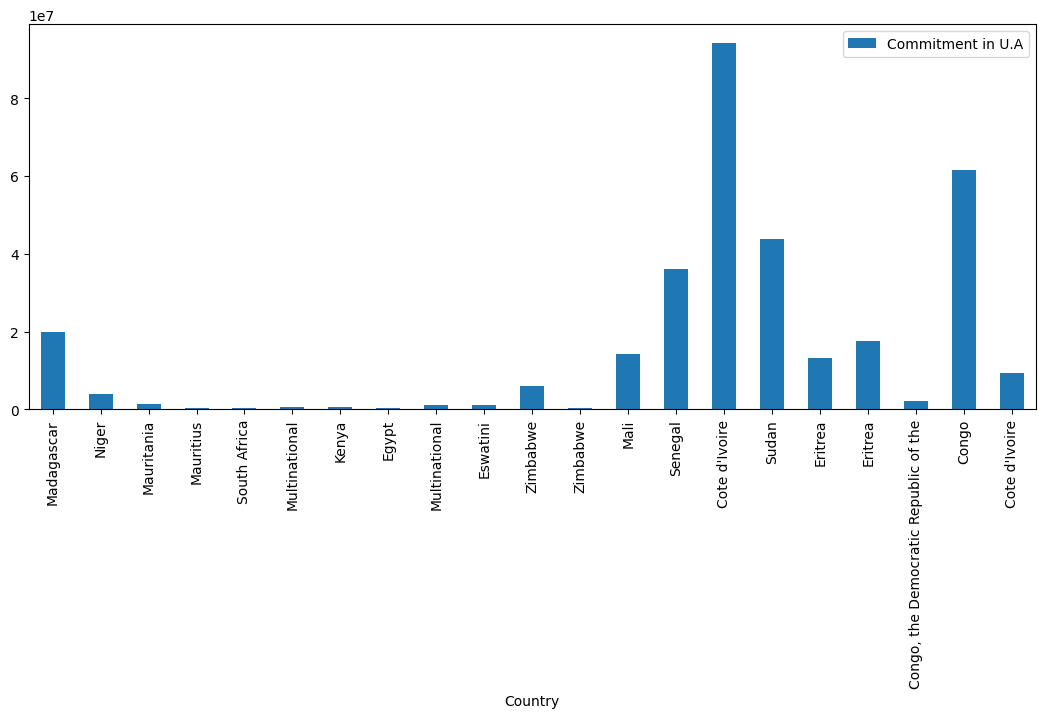

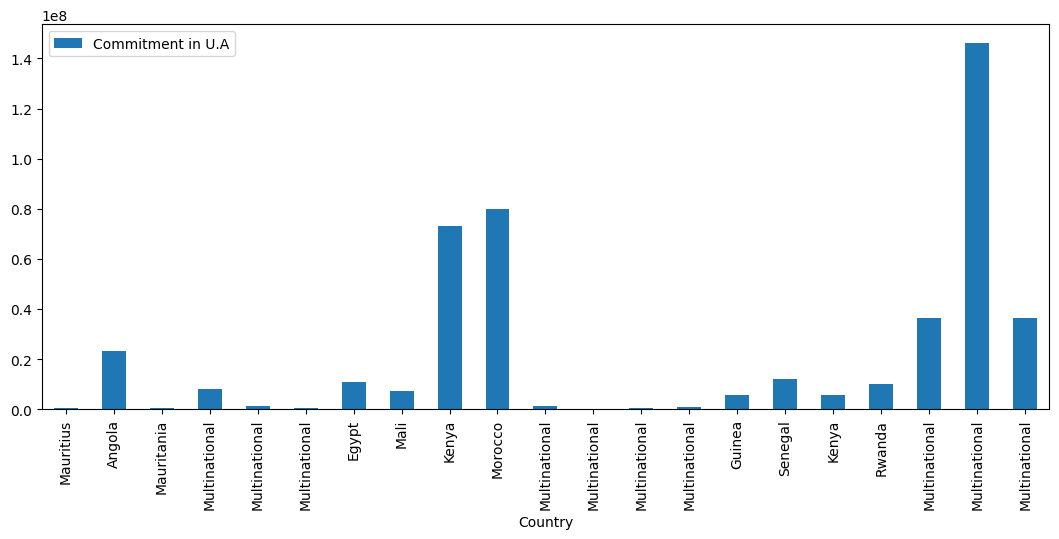

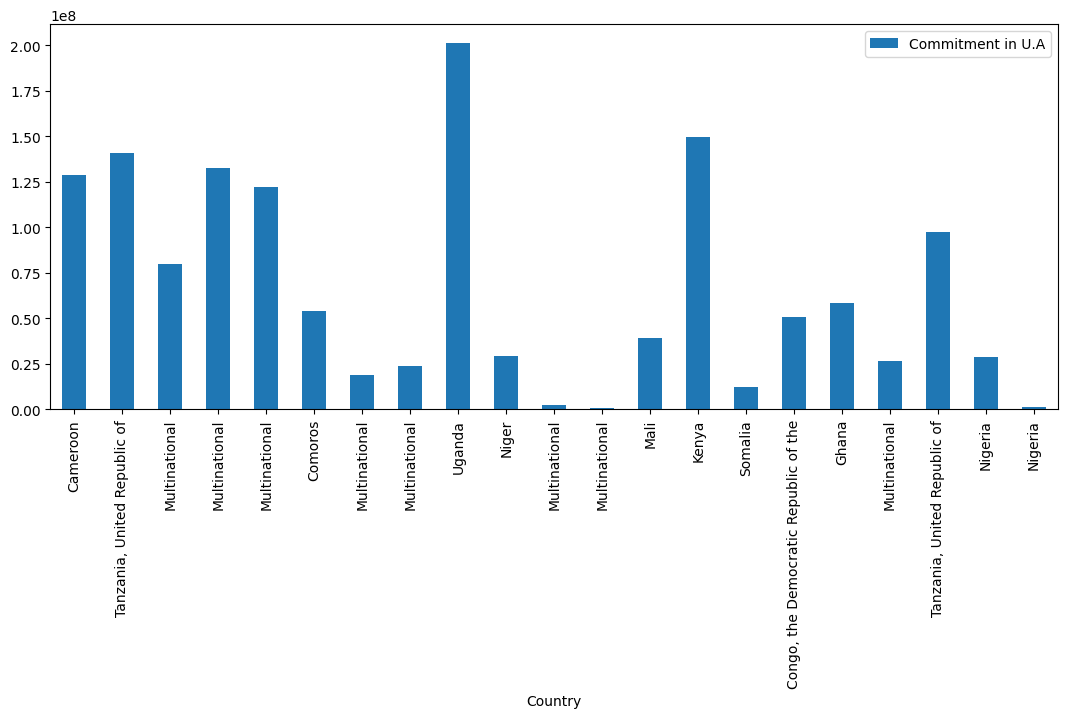

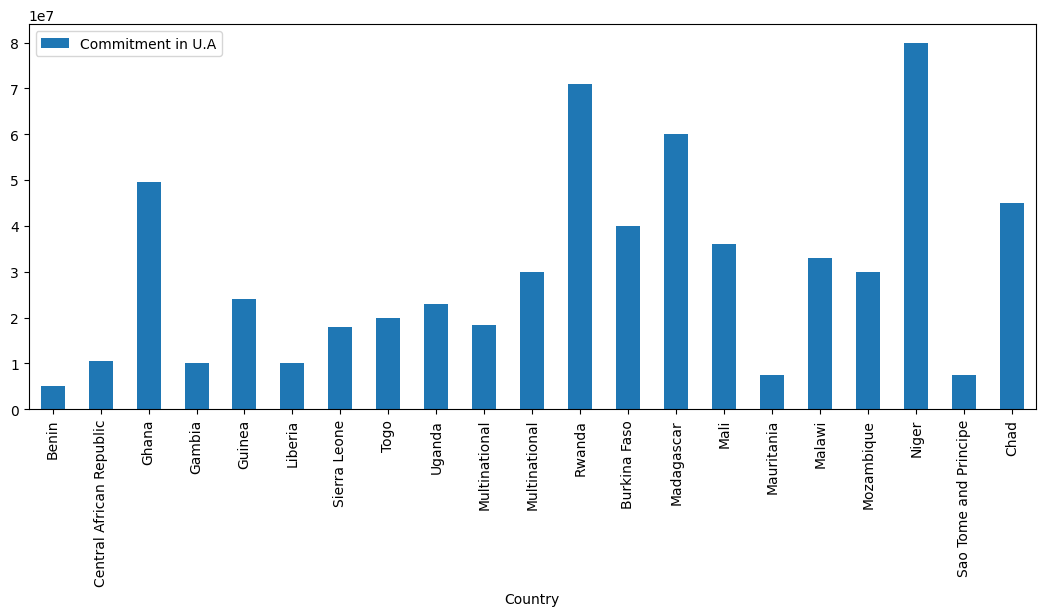

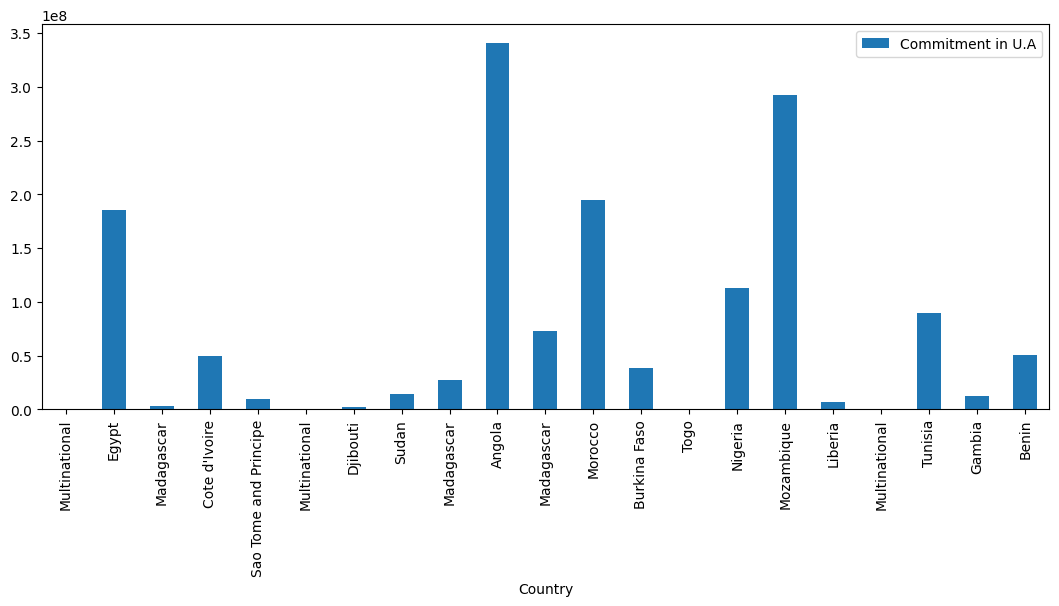

In [48]:
df1_agri.plot(x ='Country', y = 'Commitment in U.A' ,kind ='bar', figsize = (13,5))
df1_fin.plot(x ='Country', y = 'Commitment in U.A' ,kind ='bar', figsize = (13,5))
df1_tra.plot(x ='Country', y = 'Commitment in U.A' ,kind ='bar', figsize = (13,5))
df1_mul.plot(x ='Country', y = 'Commitment in U.A' ,kind ='bar', figsize = (13,5))
df1_pow.plot(x ='Country', y = 'Commitment in U.A' ,kind ='bar', figsize = (13,5))
# first multinational, second Morocco, third Kenya

In [42]:
sum_UA_mul = df1_mul['Commitment in U.A'].sum()
sum_UA_tra = df1_tra['Commitment in U.A'].sum()
sum_UA_pow = df1_pow['Commitment in U.A'].sum()
sum_UA_agri = df1_agri['Commitment in U.A'].sum()
sum_UA_fin = df1_fin['Commitment in U.A'].sum()

In [43]:
#Finance
yf1 = df1_fin.query('Country == "Multinational"')
yf2 = df1_fin.query('Country == "Morocco"')
yf3 = df1_fin.query('Country == "Kenya"')
multinational_percent = (yf1['Commitment in U.A'].sum() / sum_UA_fin) * 100
# 50.274878045406936
morocco1_percent = (yf2['Commitment in U.A'].sum() / sum_UA_fin) * 100
# 17.308766996498854
kenya1_percent = (yf3['Commitment in U.A'].sum() / sum_UA_fin) * 100
# 17.104531773436218

In [44]:
#Power
yp1 = df1_pow.query('Country == "Angola"')
yp2 = df1_pow.query('Country == "Mozambique"')
yp3 = df1_pow.query('Country == "Morocco"')
angola_percent = (yp1['Commitment in U.A'].sum() / sum_UA_pow) * 100
# 22.607751209625953
mozambique_percent = (yp2['Commitment in U.A'].sum() / sum_UA_pow) * 100
# 19.404458459382017
morocco2_percent = (yp3['Commitment in U.A'].sum() / sum_UA_pow) * 100
# 12.89769995885802

In [51]:
#Transport
yt1 = df1_tra.query('Country == "Uganda"')
yt2 = df1_tra.query('Country == "Kenya"')
yt3 = df1_tra.query('Country == "Tanzania, United Republic of"')
uganda_percent = (yt1['Commitment in U.A'].sum() / sum_UA_tra) * 100
# 14.39372966123651
kenya2_percent = (yt2['Commitment in U.A'].sum() / sum_UA_tra) * 100
# 10.677509240332622
tanzania_percent = (yt3['Commitment in U.A'].sum() / sum_UA_tra) * 100
# 17.001848235170208

In [46]:

#Agriculture
ya1 = df1_agri.query('Country == "Côte d\'Ivoire"')
ya2 = df1_agri.query('Country == "Congo"')
ya3 = df1_agri.query('Country == "Sudan"')
cote_percent = (ya1['Commitment in U.A'].sum() / sum_UA_agri) * 100
# 31.50741594033916
congo_percent = (ya2['Commitment in U.A'].sum() / sum_UA_agri) * 100
# 18.711099794684774
sudan_percent = (ya3['Commitment in U.A'].sum() / sum_UA_agri) * 100
# 13.336644343098406

In [49]:
#multi-Sector
ym1 = df1_mul.query('Country == "Niger"')
ym2 = df1_mul.query('Country == "Rwanda"')
ym3 = df1_mul.query('Country == "Madagascar"')
niger_percent = (ym1['Commitment in U.A'].sum() / sum_UA_mul) * 100
# 12.729731880022277
rwanda_percent = (ym2['Commitment in U.A'].sum() / sum_UA_mul) * 100
# 11.29763704351977
madagascar_percent = (ym3['Commitment in U.A'].sum() / sum_UA_mul) * 100
# 9.547298910016707

### after we computed each percent we will now find the percent for the rest of the countries in Africa

In [52]:
rest_finance = 100 - (multinational_percent + morocco1_percent + kenya1_percent)
rest_agriculture = 100 - (cote_percent + congo_percent + sudan_percent)
rest_power = 100 - (angola_percent + mozambique_percent + morocco2_percent)
rest_transport = 100 - (uganda_percent + kenya2_percent + tanzania_percent)
rest_multi = 100 - (niger_percent + rwanda_percent + madagascar_percent)

In [53]:
dfchart1 = pd.DataFrame({'finance sector':[multinational_percent, morocco1_percent, kenya1_percent, rest_finance]}, index = ['Multinational', 'Morocco', 'Kenya', 'Rest of Africa'])
dfchart2 = pd.DataFrame({'agriculture sector': [cote_percent, congo_percent, sudan_percent, rest_agriculture]}, index = ['Cote d\'Ivoire', 'Congo', 'Sudan', 'Rest of Africa'])
dfchart3 = pd.DataFrame({'power sector': [angola_percent, mozambique_percent, morocco2_percent, rest_power]}, index = ['Angola', 'Mozambique', 'Morocco', 'Rest of Africa'])
dfchart4 = pd.DataFrame({'transport sector': [uganda_percent, kenya2_percent, tanzania_percent, rest_transport]}, index = ['Uganda', ' Kneya', 'Tanzania', 'Rest of Africa'])
dfchart5 = pd.DataFrame({'multi sector': [niger_percent, rwanda_percent, madagascar_percent, rest_multi]}, index = ['Niger', 'Rwanda', 'Madagascar', 'Rest of Africa'])

<Axes: ylabel='multi sector'>

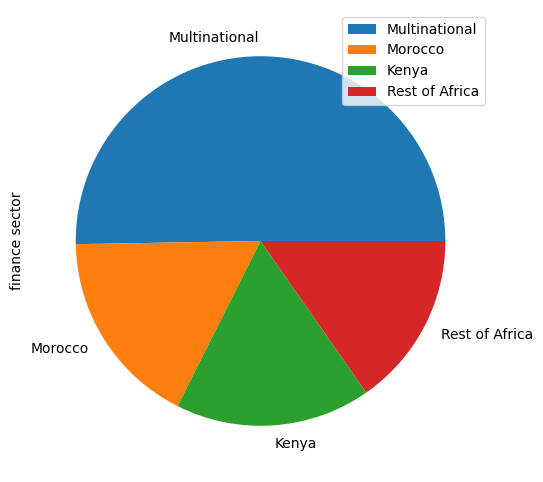

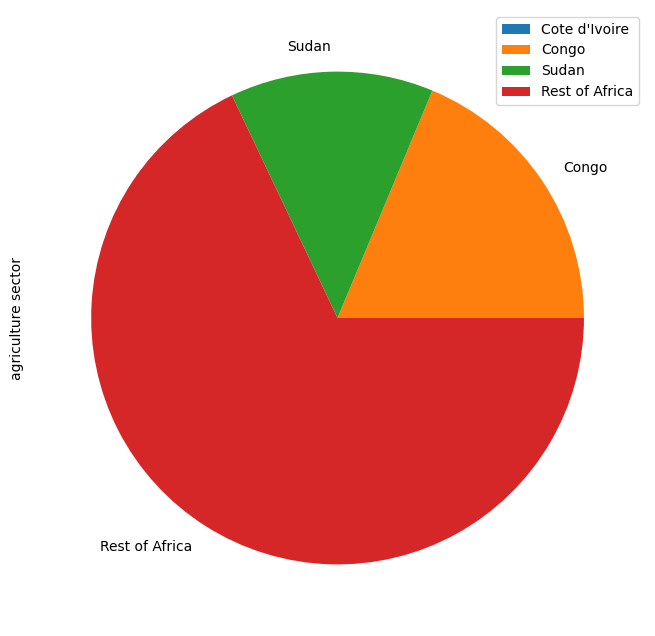

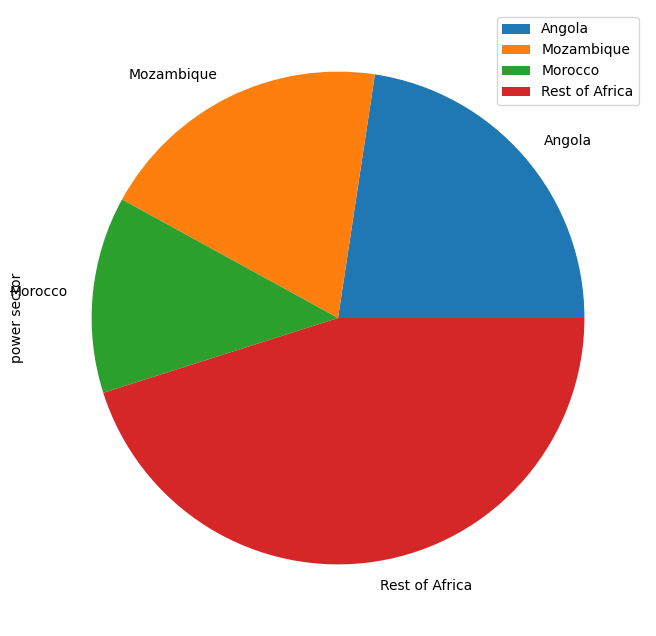

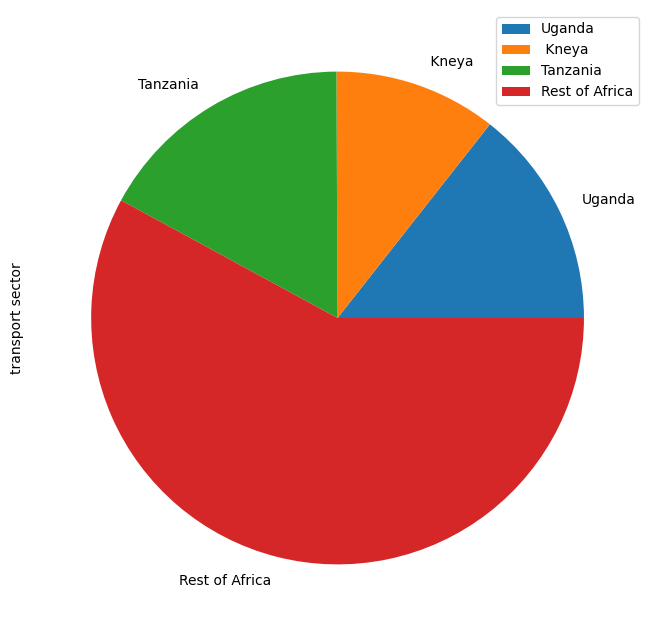

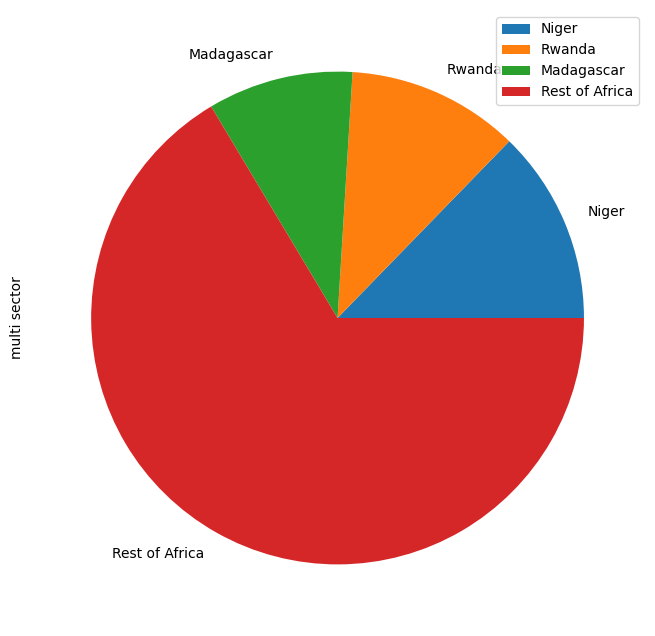

In [56]:
dfchart1.plot.pie(y = 'finance sector', figsize = (12,6))
dfchart2.plot.pie(y = 'agriculture sector', figsize = (8,8))
dfchart3.plot.pie(y = 'power sector', figsize = (8,8))
dfchart4.plot.pie(y = 'transport sector', figsize = (8,8))
dfchart5.plot.pie(y = 'multi sector', figsize = (8,8))

# Conclusion
top 3 countries in Finance sector:
* Multinational
* Morocco
* Kenya

top 3 countries in Agriculture sector:
* Côte d'Ivoire
* Congo
* Sudan

top 3 countries in Power sector:
* Angola
* Mozambique
* Morocco

top 3 countries in Transport sector:
* Tanzania
* Uganda
* Kenya

top 3 countries in Multi-Sector:

* Niger
* Rwanda
* Madagascar